<a href="https://colab.research.google.com/github/cliu001/Iris/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

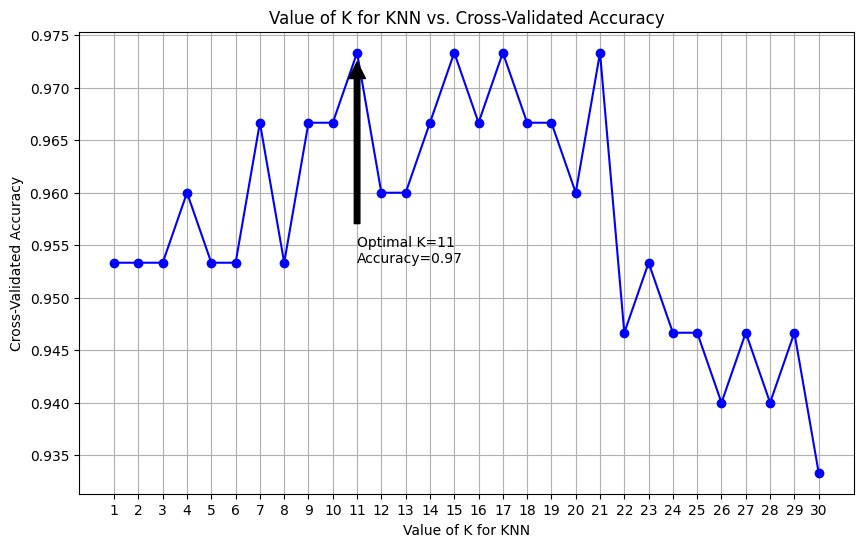

The optimal k value is 11 with mean accuracy 0.97
Best k according to GridSearchCV: 13
Best accuracy according to GridSearchCV: 0.98


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold  # Import KFold

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Define a range of values for "k"
k_range = range(1, 31)  # 1 to 30

# Initialize lists to store mean accuracy scores and optimal k
mean_scores = []
optimal_k = 11  # You mentioned that k=11 is optimal

# Iterate over each value of "k"
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform 10-fold cross-validation and store the mean accuracy score
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=knn, X=X, y=y, cv=kfold)
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_scores, marker='o', linestyle='-', color='b')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.annotate(f'Optimal K={optimal_k}\nAccuracy={mean_scores[optimal_k-1]:.2f}',
             xy=(optimal_k, mean_scores[optimal_k-1]),
             xytext=(optimal_k, mean_scores[optimal_k-1] - 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

print(f"The optimal k value is {optimal_k} with mean accuracy {mean_scores[optimal_k-1]:.2f}")

# Use GridSearchCV to confirm k=13 has the optimal parameter
param_grid = {'n_neighbors': [13]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_

print(f"Best k according to GridSearchCV: {best_k}")
print(f"Best accuracy according to GridSearchCV: {best_accuracy:.2f}")



